# MACHINE LEARNING PROJECT
# A COMPARATIVE MODEL ANALYSIS BASED APPROACH FOR TIME SERIES DATA

These days Cryptocurrency is playing big role in creasing our market capitalization. Therefore, the objective of this project is to predict the the bitcoin price using various Time Series models like: Moving Averages, Auto Regressive Integrated Moving Average (ARIMA), XGBoost and Long Short term Memory Model (LSTM). At last we are comparing their results based on Root Mean Squared Error (RMSE).






# Time Series



*   Sequentially ordered data over time
*   Obeservations are generally collected at regular intervals like: 


1.   Every Second/ Minute/Hourly
2.   Daily
3.   Monthly
4.   Quarterly/Yearly



# Key Concepts in Time series


*   Trends
*   Seasonality
*   Cyclic
*   Stationary


# Key Points to remember in Time Series 



*   Time series can be irregularly spread
*   External factors can contribute to target variable and needs to be factored in
*   Time series is mostly data analysis
*   Understanding Seasonality and Cyclic can be confusing
*   Be careful with missing information















#DATA ANALYSIS

In [1]:
# Loading Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [2]:
# Loading Bitcoin dataset in a dataframe named df

from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['BitcoinDataset3.csv']))
print(df)

Saving BitcoinDataset3.csv to BitcoinDataset3.csv
              Date      Price       Open  ...        Low     Vol. Change %
0     Aug 02, 2020  11,105.80  11,802.60  ...  10,730.70  698.62K   -5.91%
1     Aug 01, 2020  11,803.10  11,333.20  ...  11,226.10  611.47K    4.14%
2     Jul 31, 2020  11,333.40  11,096.50  ...  10,964.60  530.95K    2.14%
3     Jul 30, 2020  11,096.20  11,105.80  ...  10,861.60  501.14K   -0.09%
4     Jul 29, 2020  11,105.90  10,908.40  ...  10,771.80  576.83K    1.81%
...            ...        ...        ...  ...        ...      ...      ...
1185  May 05, 2017   1,507.80   1,516.80  ...   1,485.00  120.38K   -0.59%
1186  May 04, 2017   1,516.80   1,485.60  ...   1,437.10  136.71K    2.10%
1187  May 03, 2017   1,485.60   1,445.90  ...   1,424.10   81.72K    2.74%
1188  May 02, 2017   1,445.90   1,415.80  ...   1,394.80   70.01K    2.13%
1189  May 01, 2017   1,415.80   1,351.90  ...   1,342.80  100.44K    0.00%

[1190 rows x 7 columns]


In [3]:
#Visualization of data

df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,105.80","11,802.60","12,061.10","10,730.70",698.62K,-5.91%
1,"Aug 01, 2020","11,803.10","11,333.20","11,847.70","11,226.10",611.47K,4.14%
2,"Jul 31, 2020","11,333.40","11,096.50","11,434.80","10,964.60",530.95K,2.14%
3,"Jul 30, 2020","11,096.20","11,105.80","11,164.40","10,861.60",501.14K,-0.09%
4,"Jul 29, 2020","11,105.90","10,908.40","11,336.50","10,771.80",576.83K,1.81%
...,...,...,...,...,...,...,...
1185,"May 05, 2017","1,507.80","1,516.80","1,588.10","1,485.00",120.38K,-0.59%
1186,"May 04, 2017","1,516.80","1,485.60","1,609.80","1,437.10",136.71K,2.10%
1187,"May 03, 2017","1,485.60","1,445.90","1,496.40","1,424.10",81.72K,2.74%
1188,"May 02, 2017","1,445.90","1,415.80","1,471.10","1,394.80",70.01K,2.13%


In [4]:
# Displaying the information of dataframe

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1190 non-null   object
 1   Price     1190 non-null   object
 2   Open      1190 non-null   object
 3   High      1190 non-null   object
 4   Low       1190 non-null   object
 5   Vol.      1187 non-null   object
 6   Change %  1190 non-null   object
dtypes: object(7)
memory usage: 65.2+ KB
None


In [5]:
# Changing the name of Volume Column to represent volumn in thousands

df.rename(columns = {'Vol.': 'Vol(in K)'}, inplace=True)

Changing the format of attribute values 

In [6]:
# Changing the format of attribute values

df["Price"] = df["Price"].replace(",", "", regex=True)
df["Open"] = df["Open"].replace(",", "", regex=True)
df["High"] = df["High"].replace(",", "", regex=True)
df["Low"] = df["Low"].replace(",", "", regex=True)
df["Vol(in K)"] = df["Vol(in K)"].replace("K", "", regex=True)
df["Vol(in K)"] = df["Vol(in K)"].replace("M", "", regex=True)
df["Change %"] = df["Change %"].replace("%", "", regex=True)

In [7]:
#Displaying final Dataframe

df.head()

,Date,Price,Open,High,Low,Vol(in K),Change %
0,"Aug 02, 2020",11105.80,11802.60,12061.10,10730.70,698.62,-5.91
1,"Aug 01, 2020",11803.10,11333.20,11847.70,11226.10,611.47,4.14
2,"Jul 31, 2020",11333.40,11096.50,11434.80,10964.60,530.95,2.14
3,"Jul 30, 2020",11096.20,11105.80,11164.40,10861.60,501.14,-0.09
4,"Jul 29, 2020",11105.90,10908.40,11336.50,10771.80,576.83,1.81


In [8]:
# Converting Object Column to float

df["Price"] = df["Price"].astype('float64') 
df["Open"] = df["Open"].astype('float64') 
df["High"] = df["High"].astype('float64') 
df["Low"] = df["Low"].astype('float64') 
df['Vol(in K)'] = pd.to_numeric(df['Vol(in K)'],errors='coerce')
df["Change %"] = df["Change %"].astype('float64') 

In [9]:
# Displaying the Information of Dataframe

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1190 non-null   object 
 1   Price      1190 non-null   float64
 2   Open       1190 non-null   float64
 3   High       1190 non-null   float64
 4   Low        1190 non-null   float64
 5   Vol(in K)  1187 non-null   float64
 6   Change %   1190 non-null   float64
dtypes: float64(6), object(1)
memory usage: 65.2+ KB
None


In [10]:
# Question: Are there any "Missing" values present in the Dataset?

df.isna().sum()

Date         0
Price        0
Open         0
High         0
Low          0
Vol(in K)    3
Change %     0
dtype: int64

How many unique values each column has ?

In [11]:
# How many unique values each column has? 

df.nunique()

Date         1190
Price        1184
Open         1178
High         1180
Low          1183
Vol(in K)    1122
Change %      776
dtype: int64

Take a look at the Summary of the Dataset

In [12]:
# Take a look at the summary of the Dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1190.0,7252.800504,2992.103176,1415.80,4865.425,7292.850,9232.6250,19345.50
Open,1190.0,7244.515798,2994.837939,1351.90,4832.975,7289.400,9230.5250,19346.60
High,1190.0,7452.483109,3110.469739,1448.70,5017.400,7455.150,9392.3500,19870.60
Low,1190.0,7012.438824,2837.488382,1342.80,4607.625,7121.900,9048.2000,18750.90
Vol(in K),1187.0,320.976773,283.020520,1.00,92.115,217.960,535.6700,999.53
Change %,1190.0,0.272403,4.422303,-39.18,-1.610,0.155,2.1375,25.56


In [13]:
# Converting date Column to standard format i.e. in numeric format so that we 
#can do some month level analysis as well

df['Date']=pd.to_datetime(df['Date'])

In [14]:
# Again Displaying dataframe

print(df)

           Date    Price     Open     High      Low  Vol(in K)  Change %
0    2020-08-02  11105.8  11802.6  12061.1  10730.7     698.62     -5.91
1    2020-08-01  11803.1  11333.2  11847.7  11226.1     611.47      4.14
2    2020-07-31  11333.4  11096.5  11434.8  10964.6     530.95      2.14
3    2020-07-30  11096.2  11105.8  11164.4  10861.6     501.14     -0.09
4    2020-07-29  11105.9  10908.4  11336.5  10771.8     576.83      1.81
...         ...      ...      ...      ...      ...        ...       ...
1185 2017-05-05   1507.8   1516.8   1588.1   1485.0     120.38     -0.59
1186 2017-05-04   1516.8   1485.6   1609.8   1437.1     136.71      2.10
1187 2017-05-03   1485.6   1445.9   1496.4   1424.1      81.72      2.74
1188 2017-05-02   1445.9   1415.8   1471.1   1394.8      70.01      2.13
1189 2017-05-01   1415.8   1351.9   1448.7   1342.8     100.44      0.00

[1190 rows x 7 columns]


In [15]:
# Setting date as Index 

df_non_indexed=df.copy()
df=df.set_index('Date')

In [16]:
# Displaying top 5 entries of our Dataframe to verify the Date index column

df.head()

,Price,Open,High,Low,Vol(in K),Change %
Date,,,,,,
2020-08-02,11105.8,11802.6,12061.1,10730.7,698.62,-5.91
2020-08-01,11803.1,11333.2,11847.7,11226.1,611.47,4.14
2020-07-31,11333.4,11096.5,11434.8,10964.6,530.95,2.14
2020-07-30,11096.2,11105.8,11164.4,10861.6,501.14,-0.09
2020-07-29,11105.9,10908.4,11336.5,10771.8,576.83,1.81


In [17]:
# Getting Data between two dates

df.loc['2020-08-02':'2020-07-29']

,Price,Open,High,Low,Vol(in K),Change %
Date,,,,,,
2020-08-02,11105.8,11802.6,12061.1,10730.7,698.62,-5.91
2020-08-01,11803.1,11333.2,11847.7,11226.1,611.47,4.14
2020-07-31,11333.4,11096.5,11434.8,10964.6,530.95,2.14
2020-07-30,11096.2,11105.8,11164.4,10861.6,501.14,-0.09
2020-07-29,11105.9,10908.4,11336.5,10771.8,576.83,1.81


In [18]:
# Getting data between two years

df.loc['2019':'2018']

,Price,Open,High,Low,Vol(in K),Change %
Date,,,,,,
2019-12-31,7196.4,7261.5,7331.0,7167.4,586.60,-0.90
2019-12-30,7261.8,7397.5,7420.9,7244.1,606.11,-1.84
2019-12-29,7397.5,7321.6,7518.9,7303.0,611.69,1.04
2019-12-28,7321.5,7261.9,7375.9,7256.5,610.96,0.82
2019-12-27,7261.7,7210.8,7293.8,7128.5,718.07,0.70
...,...,...,...,...,...,...
2018-01-05,16954.8,15180.1,17126.9,14832.4,141.96,11.69
2018-01-04,15180.1,15156.5,15408.7,14244.7,110.97,0.15
2018-01-03,15156.6,14754.1,15435.0,14579.7,106.54,2.73


In [19]:
# Setting Price column as our target column

print('Please identify the Target column')
print('\n')
target=df['Price']
target.head()

Please identify the Target column




Date
2020-08-02    11105.8
2020-08-01    11803.1
2020-07-31    11333.4
2020-07-30    11096.2
2020-07-29    11105.9
Name: Price, dtype: float64

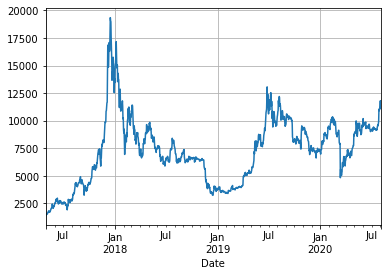

In [20]:
# Plotting of Target Data

target.plot(grid=True)

Conclusion from above plot: 

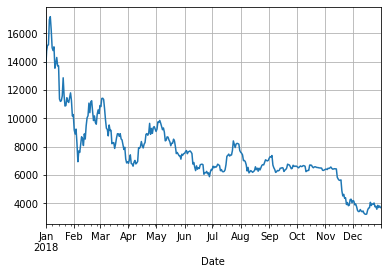

In [21]:
# To Visualize Plotting of a particular year 2018

df_2018=df.loc['2018']
target_2018=df_2018['Price']
target_2018.plot(grid=True)

Conclusion from above plot:

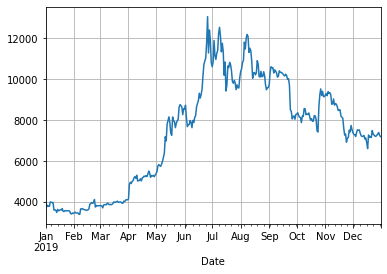

In [22]:
# To Visualize Plotting of a particular year 2019

df_2019=df.loc['2019']
target_2019=df_2019['Price']
target_2019.plot(grid=True)

Coclusion from above plot: 

In [23]:
# To Visualize Plotting of a particular year

import plotly.express as px
fig=px.line(df_non_indexed, x='Date',y='Price', title='Price with slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Putting Button to directly switch between years in graph

In [24]:
fig=px.line(df_non_indexed, x='Date',y='Price', title='Price with slider')
fig.update_xaxes(
    rangeslider_visible=True, rangeselector=dict(
        buttons=list([
              dict(count=1, label="1y", step="year", stepmode="backward"),
              dict(count=2, label="2y", step="year", stepmode="backward"),
              dict(count=3, label="3y", step="year", stepmode="backward"),
              dict(count=4, label="4y", step="year", stepmode="backward"),
              dict(step="all")
        ])
    ))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fabd8be5210>,
      dtype=object)

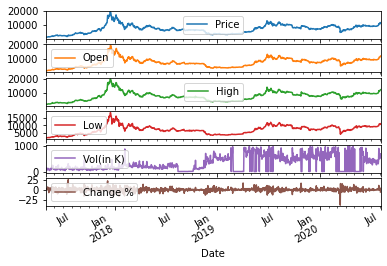

In [25]:
# Plotting all variables

all_var_plot=df[['Price','Open','High','Low','Vol(in K)','Change %']]
all_var_plot.plot(subplots=True)

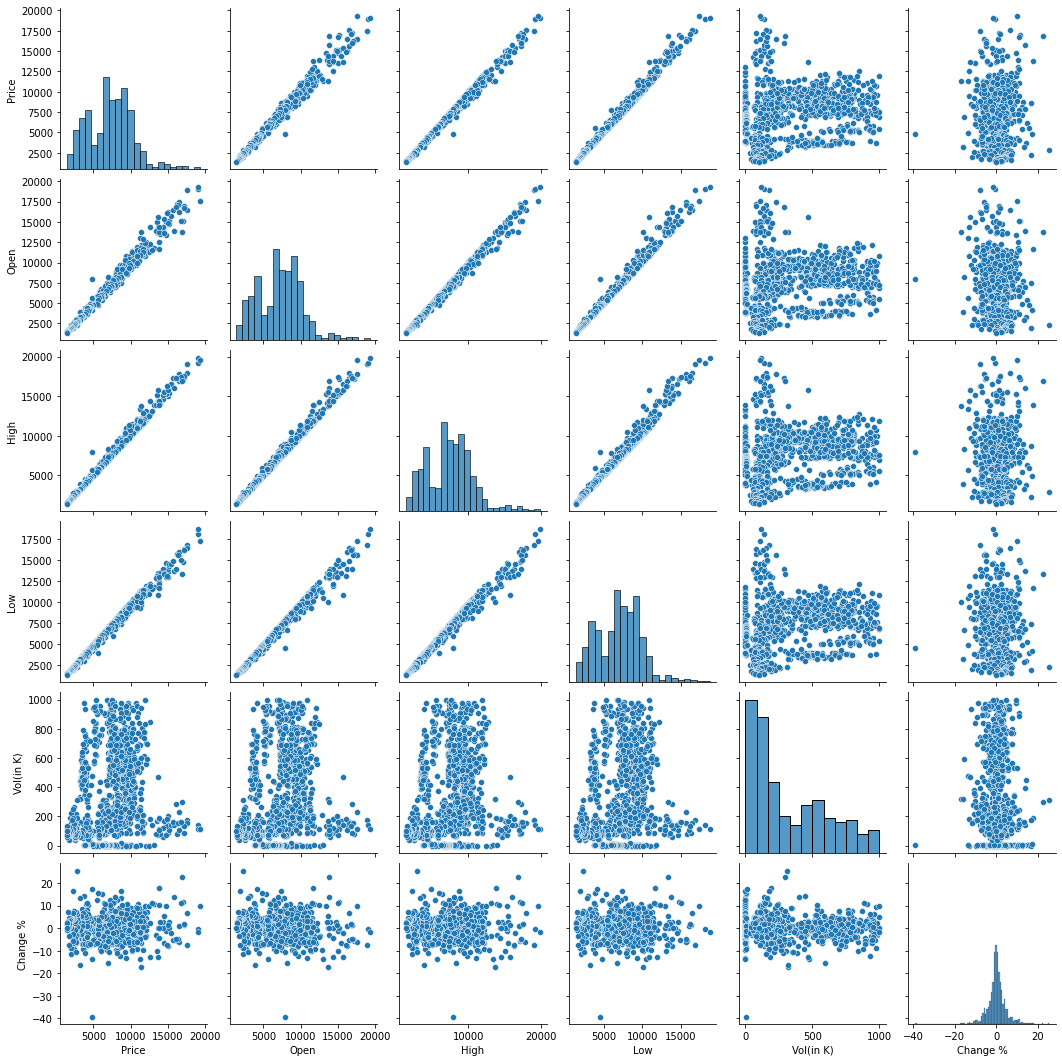

In [26]:
# Checking correlation between two different variables

import seaborn as sns
g=sns.pairplot(df[['Price','Open','High','Low','Vol(in K)','Change %']])

In [27]:
# Checking correlation in form of matrix

corr=df[['Price','Open','High','Low','Vol(in K)','Change %']].corr(method='pearson')
corr

,Price,Open,High,Low,Vol(in K),Change %
Price,1.000000,0.992000,0.996439,0.995404,0.182075,0.026430
Open,0.992000,1.000000,0.996026,0.992945,0.185995,-0.087664
High,0.996439,0.996026,1.000000,0.991235,0.173983,-0.026556
Low,0.995404,0.992945,0.991235,1.000000,0.197464,-0.018682
Vol(in K),0.182075,0.185995,0.173983,0.197464,1.000000,-0.054359
Change %,0.026430,-0.087664,-0.026556,-0.018682,-0.054359,1.000000


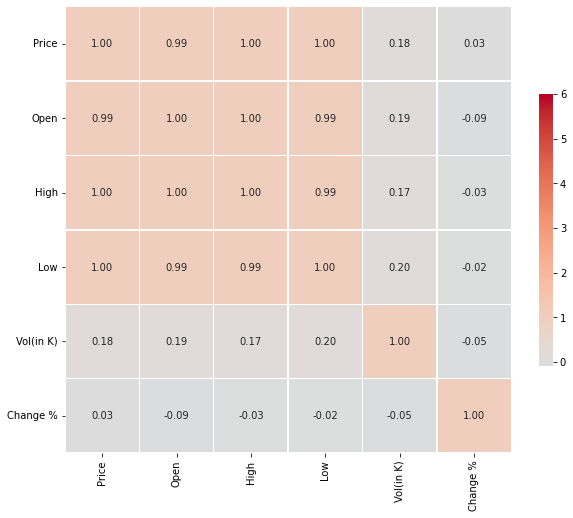

In [28]:
# Geberating Heatmap correlation matrix to visualize correlation in better way

h=sns.heatmap(corr, vmax=6, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt='.2f', cmap='coolwarm')
h.figure.set_size_inches(10,10)
pt.show()

In [29]:
# Dealing with missing values

df.isna().sum()

Price        0
Open         0
High         0
Low          0
Vol(in K)    3
Change %     0
dtype: int64

In [30]:
# Visualization of missing values

fig=px.line(df_non_indexed, x='Date',y='Vol(in K)', title='Volume with slider')
fig.update_xaxes(
    rangeslider_visible=True, rangeselector=dict(
        buttons=list([
              dict(count=1, label="1y", step="year", stepmode="backward"),
              dict(count=2, label="2y", step="year", stepmode="backward"),
              dict(count=3, label="3y", step="year", stepmode="backward"),
              dict(count=4, label="4y", step="year", stepmode="backward"),
              dict(step="all")
        ])
    ))

In [31]:
# Auto correlation graph

df_na=df.copy()
df_na=df_na.dropna()

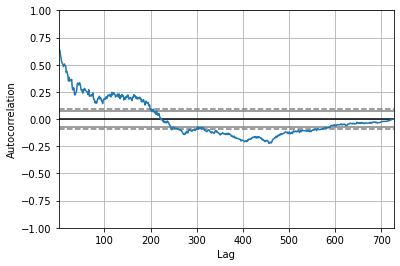

In [32]:
# Visualizing Data in days form from 2018 to 2019

pd.plotting.autocorrelation_plot(df_na['2019':'2018']['Vol(in K)'])

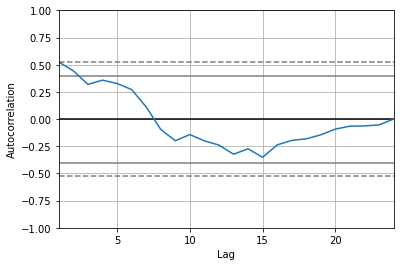

In [33]:
# Visualizing Data in months form from 2018 to 2019

pd.plotting.autocorrelation_plot(df_na['2019':'2018']['Vol(in K)'].resample("1m").mean())

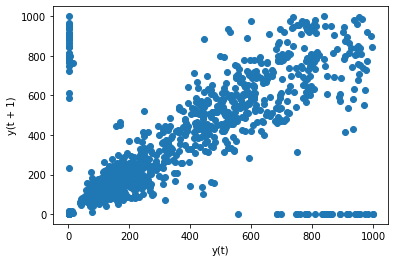

In [34]:
pd.plotting.lag_plot(df['Vol(in K)'],lag=1)

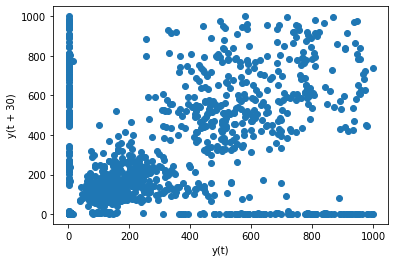

In [35]:
pd.plotting.lag_plot(df['Vol(in K)'],lag=30)

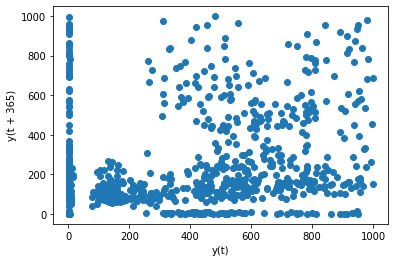

In [36]:
pd.plotting.lag_plot(df['Vol(in K)'],lag=365)

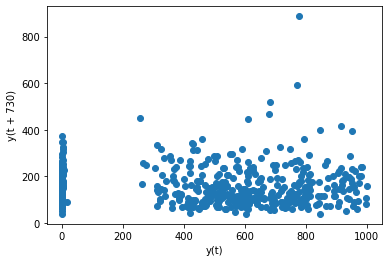

In [37]:
pd.plotting.lag_plot(df['Vol(in K)'],lag=730)

# Missing Values

we have already seen various methods to deal with missing values like: global mean, global median, drop values etc. But in time series we can not deal with missing data using drop values. The reason is: in time series we care about the order of events. In addition to this we can not even use global median or global mean because our data might have some seasonality or trend and if we do global median we may messup the current information. therefore, we will use different methods here to fill our missing data like: forward fill or backward fill methods.

In [38]:
df_imp=df['2018-12-31':'2018-11-25'][['Vol(in K)']]

In [39]:
df_imp

,Vol(in K)
Date,
2018-12-31,NaN
2018-12-30,519.17
2018-12-29,505.41
2018-12-28,565.24
2018-12-27,543.44
2018-12-26,567.11
2018-12-25,670.94
2018-12-24,716.29
2018-12-23,572.21


In [40]:
df_imp['Vol_Ffill']=df_imp['Vol(in K)'].fillna(method='ffill')

In [41]:
df_imp

,Vol(in K),Vol_Ffill
Date,,
2018-12-31,NaN,NaN
2018-12-30,519.17,519.17
2018-12-29,505.41,505.41
2018-12-28,565.24,565.24
2018-12-27,543.44,543.44
2018-12-26,567.11,567.11
2018-12-25,670.94,670.94
2018-12-24,716.29,716.29
2018-12-23,572.21,572.21


In [42]:
df_imp['Vol_Bfill']=df_imp['Vol(in K)'].fillna(method='bfill')

In [43]:
df_imp

,Vol(in K),Vol_Ffill,Vol_Bfill
Date,,,
2018-12-31,NaN,NaN,519.17
2018-12-30,519.17,519.17,519.17
2018-12-29,505.41,505.41,505.41
2018-12-28,565.24,565.24,565.24
2018-12-27,543.44,543.44,543.44
2018-12-26,567.11,567.11,567.11
2018-12-25,670.94,670.94,670.94
2018-12-24,716.29,716.29,716.29
2018-12-23,572.21,572.21,572.21


In [44]:
new_df=df.fillna(method='ffill')

In [45]:
new_df.isna().sum()

Price        0
Open         0
High         0
Low          0
Vol(in K)    0
Change %     0
dtype: int64

In [46]:
new_df

,Price,Open,High,Low,Vol(in K),Change %
Date,,,,,,
2020-08-02,11105.8,11802.6,12061.1,10730.7,698.62,-5.91
2020-08-01,11803.1,11333.2,11847.7,11226.1,611.47,4.14
2020-07-31,11333.4,11096.5,11434.8,10964.6,530.95,2.14
2020-07-30,11096.2,11105.8,11164.4,10861.6,501.14,-0.09
2020-07-29,11105.9,10908.4,11336.5,10771.8,576.83,1.81
...,...,...,...,...,...,...
2017-05-05,1507.8,1516.8,1588.1,1485.0,120.38,-0.59
2017-05-04,1516.8,1485.6,1609.8,1437.1,136.71,2.10
2017-05-03,1485.6,1445.9,1496.4,1424.1,81.72,2.74


#Decomposition of Time series

Time series decomposition is a statistical technique that deconstruct a time into several componets like trend, seasonality, clyclic and stationarity. 

Need of Decomposition: Some models work better if data is stationary and others work better if data is not stationary. So decomposition of data helps us to find out which time series model we should use. 

In [47]:
fig=px.line(df_non_indexed, x='Date',y='Price', title='Price with slider')
fig.update_xaxes(
    rangeslider_visible=True, rangeselector=dict(
        buttons=list([
              dict(count=1, label="1y", step="year", stepmode="backward"),
              dict(count=2, label="2y", step="year", stepmode="backward"),
              dict(count=3, label="3y", step="year", stepmode="backward"),
              dict(count=4, label="4y", step="year", stepmode="backward"),
              dict(step="all")
        ])
    ))

Conclusion: There is no seasonality or trend in price from 2017 to 2020.

In [48]:
# kpss test to check stationarity. It can be stationary around the mean, means there is no trend in data or it can be stationary around the trend line


from statsmodels.tsa.stattools import kpss
tstest=kpss(new_df['Price'],'c')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [49]:
tstest

(0.6829481326311675,
 0.015095624306257499,
 23,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

Observation: The second column is having p value 0.01 which is less than 0.05. Hence our data is not stationary

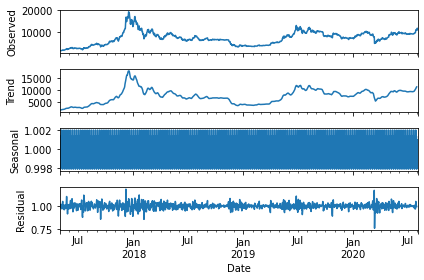

In [50]:
# Above we have seen that data is not stationary. Hence while decomposition we will use multiplicative model.

import statsmodels.api as sm
res=sm.tsa.seasonal_decompose(new_df['Price'],model='multiplicative')
resplot=res.plot()


Observation: ??

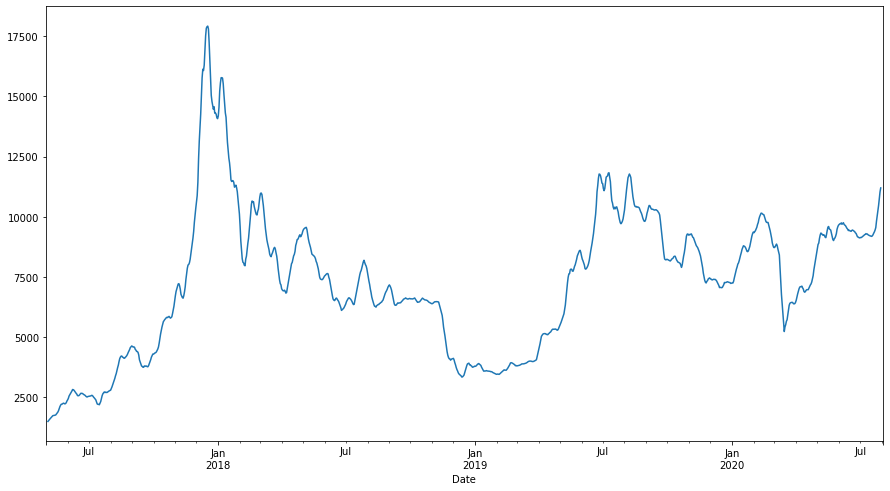

In [51]:
pt.figure(figsize=(15,8))
res.trend.plot()

Observation: ??

In [52]:
res.observed

Date
2020-08-02    11105.8
2020-08-01    11803.1
2020-07-31    11333.4
2020-07-30    11096.2
2020-07-29    11105.9
               ...   
2017-05-05     1507.8
2017-05-04     1516.8
2017-05-03     1485.6
2017-05-02     1445.9
2017-05-01     1415.8
Name: Price, Length: 1190, dtype: float64

In [53]:
print(res.trend)

Date
2020-08-02             NaN
2020-08-01             NaN
2020-07-31             NaN
2020-07-30    11196.528571
2020-07-29    11028.914286
                  ...     
2017-05-05     1531.471429
2017-05-04     1495.942857
2017-05-03             NaN
2017-05-02             NaN
2017-05-01             NaN
Name: Price, Length: 1190, dtype: float64


Observation: The initial values are null because internally it does (t-1), (t-2) .. analysis

In [54]:
print(res.seasonal)

Date
2020-08-02    0.998044
2020-08-01    1.000973
2020-07-31    0.999294
2020-07-30    0.997878
2020-07-29    1.001348
                ...   
2017-05-05    0.999294
2017-05-04    0.997878
2017-05-03    1.001348
2017-05-02    1.000459
2017-05-01    1.002004
Name: Price, Length: 1190, dtype: float64


In [55]:
res.resid

Date
2020-08-02         NaN
2020-08-01         NaN
2020-07-31         NaN
2020-07-30    0.993147
2020-07-29    1.005624
                ...   
2017-05-05    0.985239
2017-05-04    1.016098
2017-05-03         NaN
2017-05-02         NaN
2017-05-01         NaN
Name: Price, Length: 1190, dtype: float64

In [56]:
res.observed[4]

11105.9

In [57]:
# Costructing observed value by multiplying trend, seasonal and residula values.

res.trend[4]*res.seasonal[4]*res.resid[4]

11105.9

In [58]:
# To reduce the complexity of plots, we can resample data on quarterly or monthly basis

new_df['Price'].resample('Q').mean()

Date
2017-06-30     2248.745902
2017-09-30     3493.634783
2017-12-31     9403.500000
2018-03-31    10496.793333
2018-06-30     7758.698901
2018-09-30     6803.539130
2018-12-31     5215.860870
2019-03-31     3764.360000
2019-06-30     7283.050549
2019-09-30    10374.306522
2019-12-31     7986.182609
2020-03-31     8263.290110
2020-06-30     8655.456044
2020-09-30     9704.969697
Freq: Q-DEC, Name: Price, dtype: float64

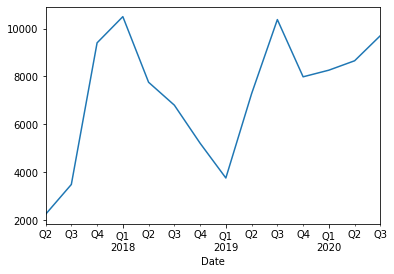

In [59]:
new_df['Price'].resample('Q').mean().plot()

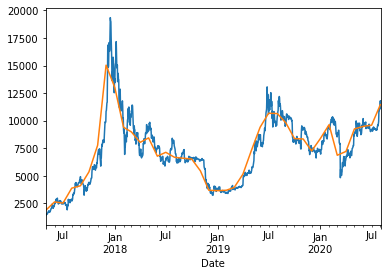

In [60]:
new_df['Price'].plot()
new_df['Price'].resample('M').mean().plot()

In [61]:
sta_df=df['Price'].diff()
sta_df.head()

Date
2020-08-02      NaN
2020-08-01    697.3
2020-07-31   -469.7
2020-07-30   -237.2
2020-07-29      9.7
Name: Price, dtype: float64

<Figure size 1440x720 with 0 Axes>

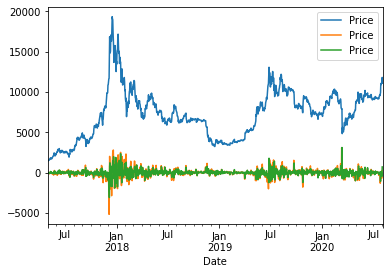

In [62]:
pt.figure(figsize=(20,10))
pd.concat([new_df['Price'],new_df['Price'].diff(2),new_df['Price'].diff()],axis=1).plot()

#MODELS

# 1. MOVING AVERAGES

if Data is not stationary then MA might not be the right choice to do forecasting. But if data is stationary then we can use MA. This is not the perfect model but its always good to start with a basic model.

In [63]:
df_ma = df['2020':'2017'][['Price']]

In [64]:
df_ma

,Price
Date,
2020-08-02,11105.8
2020-08-01,11803.1
2020-07-31,11333.4
2020-07-30,11096.2
2020-07-29,11105.9
...,...
2017-05-05,1507.8
2017-05-04,1516.8
2017-05-03,1485.6


# 1.1 Simple Moving Average

Simple Moving average calculates an average of the last n data points. Where n represents number of periods for which we want to average. 

Simple Moving Average=(t+(t-1)+(t-2)+...+(t-n))/n

In [65]:
df_ma['Price'].rolling(window=3).mean()

Date
2020-08-02             NaN
2020-08-01             NaN
2020-07-31    11414.100000
2020-07-30    11410.900000
2020-07-29    11178.500000
                  ...     
2017-05-05     1535.833333
2017-05-04     1523.300000
2017-05-03     1503.400000
2017-05-02     1482.766667
2017-05-01     1449.100000
Name: Price, Length: 1190, dtype: float64

In [66]:
df_ma['ma_rolling_3']=df_ma['Price'].rolling(window=3).mean().shift(1)

In [67]:
df_ma

,Price,ma_rolling_3
Date,,
2020-08-02,11105.8,NaN
2020-08-01,11803.1,NaN
2020-07-31,11333.4,NaN
2020-07-30,11096.2,11414.100000
2020-07-29,11105.9,11410.900000
...,...,...
2017-05-05,1507.8,1588.066667
2017-05-04,1516.8,1535.833333
2017-05-03,1485.6,1523.300000


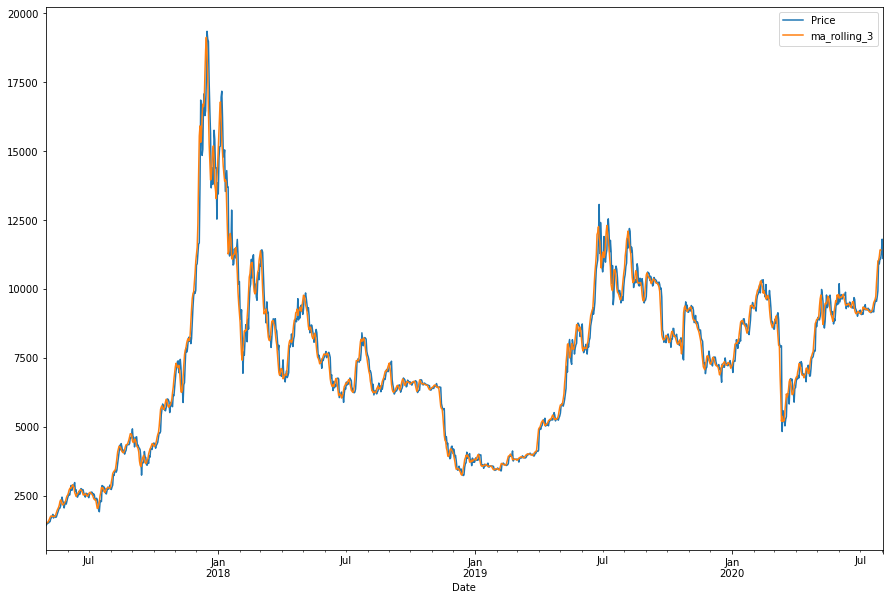

In [68]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(15,10)
mpl.rcParams['axes.grid']=False
df_ma.plot()


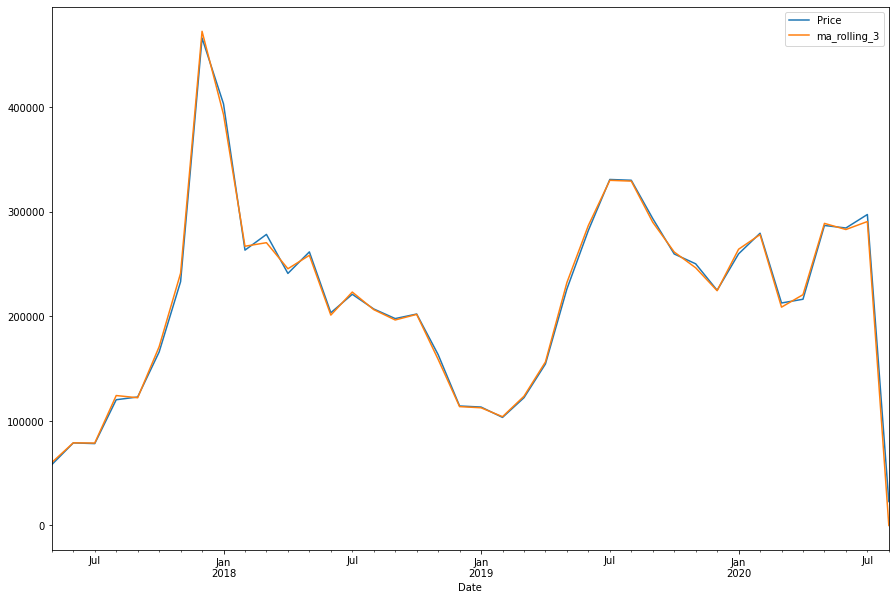

In [69]:
# Visualize data Monthwise

df_ma.resample('M').sum().plot()

# 1.2 Weighted Moving Average

Weighted Moving average gives us weighted average of last n data points where weights are assigned by us. Generally for latest data points we put higher weightage and lower weightage to previous data points. This model is generally more sensitive to data points and it can find trend sooner than Simple Moving Average. The only disadvantage of this model over Simple Moving Average is that we need to assign weights manually. 


Weighted Moving Average=(t * (weighted factor))+((t-1) * weighted factor-1)+((t-n) * weighted factor-n)/n

In [70]:
def wma(weights):
  def result(x):
    return (weights*x).mean()
  return result 

In [71]:
df_ma['Price'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

Date
2020-08-02             NaN
2020-08-01             NaN
2020-07-31    11452.033333
2020-07-30    11293.083333
2020-07-29    11140.583333
                  ...     
2017-05-05     1528.066667
2017-05-04     1518.550000
2017-05-03     1499.700000
2017-05-02     1470.950000
2017-05-01     1437.466667
Name: Price, Length: 1190, dtype: float64

In [72]:
df_ma['wma_rolling_3']=df_ma['Price'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [73]:
df_ma

,Price,ma_rolling_3,wma_rolling_3
Date,,,
2020-08-02,11105.8,NaN,NaN
2020-08-01,11803.1,NaN,NaN
2020-07-31,11333.4,NaN,NaN
2020-07-30,11096.2,11414.100000,11452.033333
2020-07-29,11105.9,11410.900000,11293.083333
...,...,...,...
2017-05-05,1507.8,1588.066667,1568.200000
2017-05-04,1516.8,1535.833333,1528.066667
2017-05-03,1485.6,1523.300000,1518.550000


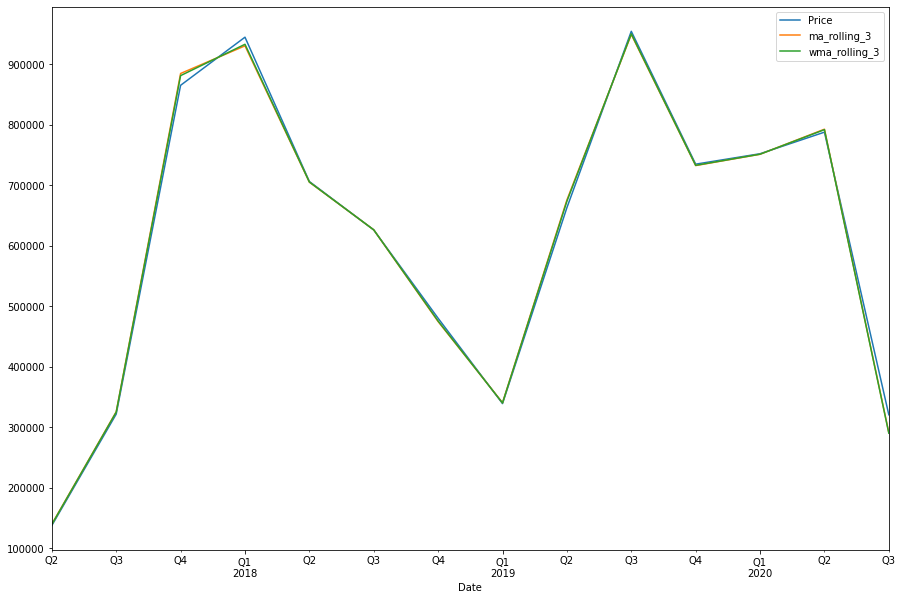

In [74]:
df_ma.resample('Q').sum().plot()

# 1.3 Exponential Moving Average

Exponential Moving Average is similar to Weighed Average but we dont assign weights here. It takes the previous time period and calculate the exponential moving average and then again take the exponential moving average as the next input instead of time (t-1) and (t-2). The advantage of Exponential Moving Average is it adopts more quickly to data point changes than Simple Moving Average and also it does not need to assign weights manually. 



In [75]:
df_ma['Price'].ewm(span=3,adjust=False,min_periods=0).mean()

Date
2020-08-02    11105.800000
2020-08-01    11454.450000
2020-07-31    11393.925000
2020-07-30    11245.062500
2020-07-29    11175.481250
                  ...     
2017-05-05     1546.674203
2017-05-04     1531.737102
2017-05-03     1508.668551
2017-05-02     1477.284275
2017-05-01     1446.542138
Name: Price, Length: 1190, dtype: float64

In [76]:
df_ma['ewm_win_3']=df_ma['Price'].ewm(span=3,adjust=False,min_periods=0).mean().shift(1)

In [77]:
df_ma

,Price,ma_rolling_3,wma_rolling_3,ewm_win_3
Date,,,,
2020-08-02,11105.8,NaN,NaN,NaN
2020-08-01,11803.1,NaN,NaN,11105.800000
2020-07-31,11333.4,NaN,NaN,11454.450000
2020-07-30,11096.2,11414.100000,11452.033333,11393.925000
2020-07-29,11105.9,11410.900000,11293.083333,11245.062500
...,...,...,...,...
2017-05-05,1507.8,1588.066667,1568.200000,1585.548407
2017-05-04,1516.8,1535.833333,1528.066667,1546.674203
2017-05-03,1485.6,1523.300000,1518.550000,1531.737102


Observation: ??

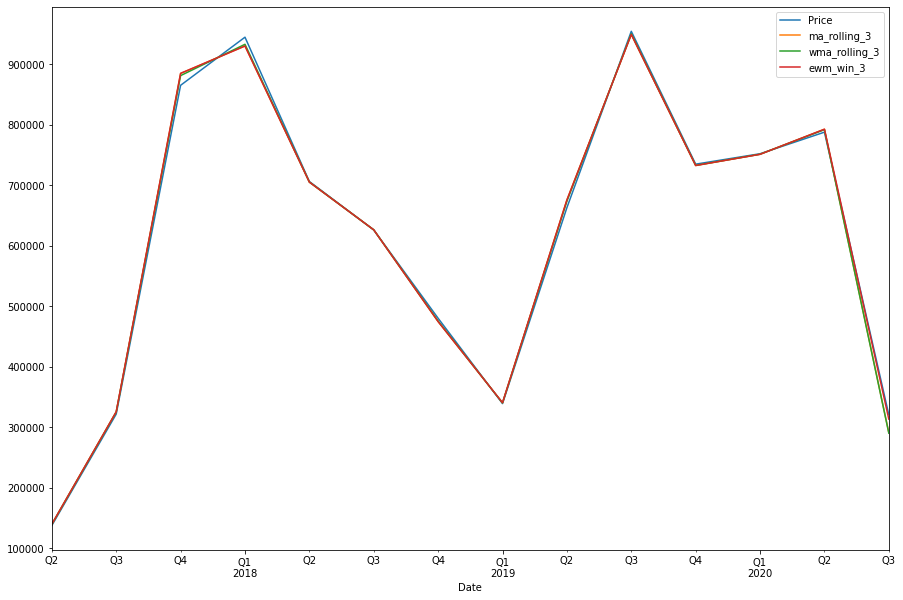

In [78]:
df_ma.resample('Q').sum().plot()

Find RMSE for all above three models:

In [79]:
# RMSE for Simple Moving Average

((df_ma['Price']-df_ma['ma_rolling_3'])**2).mean()**0.5

472.45724896106003

In [80]:
# RMSE % for Simple Moving Average

rmspe = (np.sqrt(np.mean(np.square((df_ma['Price'] - df_ma['ma_rolling_3']) / df_ma['Price'])))) * 100
print(rmspe)

5.483002449119356


In [81]:
# RMSE for Weighted Moving Average

((df_ma['Price']-df_ma['wma_rolling_3'])**2).mean()**0.5

427.9055377789721

In [82]:
# RMSE % for Weighted Moving Average

rmspe = (np.sqrt(np.mean(np.square((df_ma['Price'] - df_ma['wma_rolling_3']) / df_ma['Price'])))) * 100
print(rmspe)

4.9635184032905695


In [83]:
# RMSE for Exponential Moving Average

((df_ma['Price']-df_ma['ewm_win_3'])**2).mean()**0.5

438.02080086620896

In [84]:
# RMSE % for Exponential Moving Average

rmspe = (np.sqrt(np.mean(np.square((df_ma['Price'] - df_ma['ewm_win_3']) / df_ma['Price'])))) * 100
print(rmspe)

5.1209377690520235


#2. LSTM MODEL

LSTM is a Long Short Term Memory Model. It is a class of Recurrent Neural Network. LSTM models remember information for long periods of time and this is practically their behaviour not something they struggle to learn. 

In [85]:
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf


In [86]:
lstm_df_input=new_df[['Price','Open','High']]

In [87]:
lstm_df_input

,Price,Open,High
Date,,,
2020-08-02,11105.8,11802.6,12061.1
2020-08-01,11803.1,11333.2,11847.7
2020-07-31,11333.4,11096.5,11434.8
2020-07-30,11096.2,11105.8,11164.4
2020-07-29,11105.9,10908.4,11336.5
...,...,...,...
2017-05-05,1507.8,1516.8,1588.1
2017-05-04,1516.8,1485.6,1609.8
2017-05-03,1485.6,1445.9,1496.4


In [88]:
lstm_df_input.describe()

,Price,Open,High
count,1190.000000,1190.000000,1190.000000
mean,7252.800504,7244.515798,7452.483109
std,2992.103176,2994.837939,3110.469739
min,1415.800000,1351.900000,1448.700000
25%,4865.425000,4832.975000,5017.400000
50%,7292.850000,7289.400000,7455.150000
75%,9232.625000,9230.525000,9392.350000
max,19345.500000,19346.600000,19870.600000


Here we have large variation in some values. So we have to do some scaling.

In [89]:
# We need to scale our data before feeding into neural network, we want gradients to converge faster. 
# If we dont scale our data it may take long time to converge.
scaler=MinMaxScaler()
lstm_data_scaled=scaler.fit_transform(lstm_df_input)

In [90]:
lstm_data_scaled

array([[0.54044407, 0.58076545, 0.57607521],
       [0.57933485, 0.55467999, 0.56449118],
       [0.55313809, 0.54152612, 0.54207764],
       ...,
       [0.00389298, 0.00522376, 0.00258931],
       [0.00167878, 0.00355105, 0.00121594],
       [0.        , 0.        , 0.        ]])

In [91]:
lstm_features=lstm_data_scaled
lstm_target=lstm_data_scaled[:,0]

In [92]:
TimeseriesGenerator(lstm_features,lstm_target,length=2,sampling_rate=1,batch_size=1)[0]

(array([[[0.54044407, 0.58076545, 0.57607521],
         [0.57933485, 0.55467999, 0.56449118]]]), array([0.55313809]))

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(lstm_features,lstm_target,test_size=0.20,random_state=123,shuffle=False)
# x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.15, random_state=1)

In [94]:
x_train.shape

(952, 3)

In [95]:
x_test.shape

(238, 3)

In [96]:
#Defining actual Timeseries generator that we are going to feed into the model
win_length=10
# win_length=10
batch_size=30
# batch_size=30
num_features=3
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)
# val_generator=TimeseriesGenerator(x_val,y_val,length=win_length,sampling_rate=1,batch_size=batch_size)

In [97]:
train_generator[0]

(array([[[0.54044407, 0.58076545, 0.57607521],
         [0.57933485, 0.55467999, 0.56449118],
         [0.55313809, 0.54152612, 0.54207764],
         [0.53990864, 0.54204293, 0.52739945],
         [0.54044965, 0.53107304, 0.5367416 ],
         [0.52943998, 0.53400168, 0.52097775],
         [0.53581488, 0.47685152, 0.53839723],
         [0.47500516, 0.46336421, 0.468893  ],
         [0.46226652, 0.45540076, 0.44949761],
         [0.45347106, 0.45831828, 0.44390101]],
 
        [[0.57933485, 0.55467999, 0.56449118],
         [0.55313809, 0.54152612, 0.54207764],
         [0.53990864, 0.54204293, 0.52739945],
         [0.54044965, 0.53107304, 0.5367416 ],
         [0.52943998, 0.53400168, 0.52097775],
         [0.53581488, 0.47685152, 0.53839723],
         [0.47500516, 0.46336421, 0.468893  ],
         [0.46226652, 0.45540076, 0.44949761],
         [0.45347106, 0.45831828, 0.44390101],
         [0.4564382 , 0.45356133, 0.44500296]],
 
        [[0.55313809, 0.54152612, 0.54207764],
       

In [98]:
#Define LSTM Model

model=tf.keras.Sequential()
# model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
# model.add(tf.keras.layers.LSTM(256,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LSTM(64,input_shape=(win_length,num_features),return_sequences=True))

model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

# model.add(tf.keras.layers.LSTM(128, return_sequences=True))
# model.add(tf.keras.layers.LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))

model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dropout(0.3))

#model.add(tf.keras.layers.LSTM(128, return_sequences=True))
# model.add(tf.keras.layers.LSTM(128, return_sequences=True))
# model.add(tf.keras.layers.LSTM(128, return_sequences=True))

#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
# model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

#model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dropout(0.3))

#model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.LSTM(32,return_sequences=False))

model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1))

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17408     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 10, 64)            0         
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [100]:
#!pip install keras==2.6.0

In [101]:
#!pip install tensorflow==2.6.0

In [102]:
#pip install git+git://github.com/keras-team/keras.git --upgrade --no-deps

In [103]:
# Defining Early stopping because we dont want to run forever. So if validation los doesn't improve we can stop the training.

early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
# early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
# model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
# history=model.fit_generator(train_generator, epochs=20,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])
# history=model.fit_generator(train_generator, epochs=20,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])
# history=model.fit_generator(train_generator, epochs=20,validation_data=val_generator,shuffle=False,callbacks=[early_stopping])
# history=model.fit(x_train, y_train, epochs=20,validation_data=valid_data,shuffle=False,callbacks=[early_stopping])
history=model.fit_generator(train_generator, epochs=20,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



32/32 [==============================] - 7s 62ms/step - loss: 0.0375 - mean_absolute_error: 0.1507 - val_loss: 0.0098 - val_mean_absolute_error: 0.0843
Epoch 2/20
32/32 [==============================] - 1s 21ms/step - loss: 0.0131 - mean_absolute_error: 0.0909 - val_loss: 0.0090 - val_mean_absolute_error: 0.0825
Epoch 3/20
32/32 [==============================] - 1s 21ms/step - loss: 0.0112 - mean_absolute_error: 0.0841 - val_loss: 0.0076 - val_mean_absolute_error: 0.0778
Epoch 4/20
32/32 [==============================] - 1s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0804 - val_loss: 0.0068 - val_mean_absolute_error: 0.0752
Epoch 5/20
32/32 [==============================] - 1s 20ms/step - loss: 0.0094 - mean_absolute_error: 0.0750 - val_loss: 0.0066 - val_mean_absolute_error: 0.0750
Epoch 6/20
32/32 [==============================] - 1s 20ms/step - loss: 0.0085 - mean_absolute_error: 0.0714 - val_loss: 0.0057 - val_mean_absolute_error: 0.0696
Epoch 7/20
32/32 [===============

In [104]:
# model.evaluate_generator(val_generator,verbose=0)
model.evaluate_generator(test_generator,verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.



[0.005559174809604883, 0.0672387182712555]

In [105]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [106]:
# predictions.shape[0]

In [107]:
# predictions

In [108]:
# y_test

In [109]:
# x_test

In [110]:
# x_test[:,1:][win_length:]

In [111]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [112]:
rev_trans=scaler.inverse_transform(df_pred)

In [113]:
rev_trans

array([[15653.10125206, 16286.8       , 16941.1       ],
       [16028.59095272, 17083.9       , 17268.        ],
       [16317.76869968, 16733.3       , 17560.7       ],
       [16499.27131186, 15060.5       , 17399.2       ],
       [16518.95130081, 14840.        , 15783.2       ],
       [16411.19387665, 16048.2       , 16313.2       ],
       [16167.80109232, 16868.        , 17294.8       ],
       [15882.20560564, 13750.1       , 16879.3       ],
       [15573.26023688, 11667.1       , 13843.2       ],
       [15269.43177212, 11624.4       , 11901.9       ],
       [14988.36327068, 11244.2       , 11624.6       ],
       [14661.94155876, 10912.7       , 11851.1       ],
       [14213.78925648, 10861.5       , 11175.2       ],
       [13674.920915  ,  9947.1       , 10942.8       ],
       [13138.71575746,  9848.        , 10689.1       ],
       [12636.83703191,  9906.        , 11417.8       ],
       [12060.42121653,  9732.6       ,  9969.6       ],
       [11401.51402634,  9318.4

In [114]:
lstm_df_final=lstm_df_input[predictions.shape[0]*-1:]

In [115]:
# lstm_df_final.count()

In [116]:
lstm_df_final['Price_pred']=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
# lstm_df_final

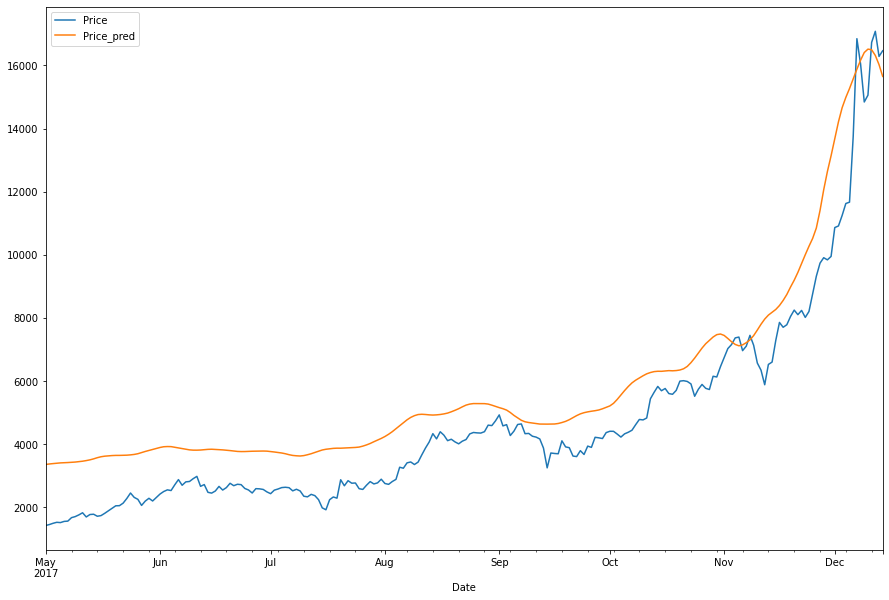

In [118]:

lstm_df_final[['Price','Price_pred']].plot()

In [119]:
# RMSE for LSTM Model

((lstm_df_final['Price']-lstm_df_final['Price_pred'])**2).mean()**0.5

1336.836148623697

In [120]:
# RMSE % for LSTM Model

rmspe = (np.sqrt(np.mean(np.square((lstm_df_final['Price']-lstm_df_final['Price_pred']) / lstm_df_final['Price'])))) * 100
print(rmspe)

47.82700161162234


# 3. XGBOOST MODEL

XGBoost stands for eXtreme Gradient Boosting. XGBoost is very efficient implementation of gradient boosting for classification as well as regression problems. While applying XGBoost on timeseries data first we need to transform our data in supervised learning. XGBoost is very good at identifying patterns in data, if we have enough temporal features describing our dataset, it  provides very decent predictions.

In [121]:
xg_df=new_df[['Price']].copy()
xg_df

,Price
Date,
2020-08-02,11105.8
2020-08-01,11803.1
2020-07-31,11333.4
2020-07-30,11096.2
2020-07-29,11105.9
...,...
2017-05-05,1507.8
2017-05-04,1516.8
2017-05-03,1485.6


Transform this to a supervised learning problem

In [122]:
xg_df["Target"]=xg_df.Price.shift(-1)
xg_df.dropna(inplace=True)

In [123]:
xg_df

,Price,Target
Date,,
2020-08-02,11105.8,11803.1
2020-08-01,11803.1,11333.4
2020-07-31,11333.4,11096.2
2020-07-30,11096.2,11105.9
2020-07-29,11105.9,10908.5
...,...,...
2017-05-06,1545.3,1507.8
2017-05-05,1507.8,1516.8
2017-05-04,1516.8,1485.6


In [124]:
# Train Test Split

def train_test_split(data, per):
  data=data.values
  n=int(len(data) * (1-per))
  return data[:n], data[n:]


In [125]:
train, test = train_test_split(xg_df, 0.2)

In [126]:
print(len(df))
print(len(train))
print(len(test))

1190
951
238


In [127]:
X=train[:, :-1]
y=train[:,-1]

In [128]:
# Prediction

def xgb_predict(train, val):
  train = np.array(train)
  X,y = train[:, :-1], train[:, -1]
  model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
  # model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1, booster='gbtree', max_depth=6, gamma=0 )
  # model = XGBRegressor(objective="reg:squarederror", n_estimators=2000, learning_rate=0.1, booster='gbtree', max_depth=6, gamma=0 )
  # model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, learning_rate=0.1, booster='gbtree', max_depth=10, gamma=0)
  model.fit(X,y)

  val = np.array(val).reshape(1,-1)
  pred=model.predict(val)
  return pred[0]

In [129]:
# Walk Forward Validation

from sklearn.metrics import mean_squared_error

def validate(data,per):
  predictions = []

  train, test = train_test_split(data,per)
  history = [x for x in train]

  for i in range(len(test)):
    test_X, test_y = test[i, :-1], test[i, -1]
    pred = xgb_predict(history, test_X[0])
    predictions.append(pred)

    history.append(test[i])

  error = mean_squared_error(test[:,-1], predictions, squared=False)

  return error, test[:,-1], predictions

In [130]:
from xgboost import XGBRegressor
#%%time
rmse,y,pred = validate(xg_df, 0.2)
print(rmse)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



513.6327119929689


In [131]:
# RMSE % for XGBoost Model

rmspe = (np.sqrt(np.mean(np.square((y-pred) / y)))) * 100
print(rmspe)

7.591406062882989


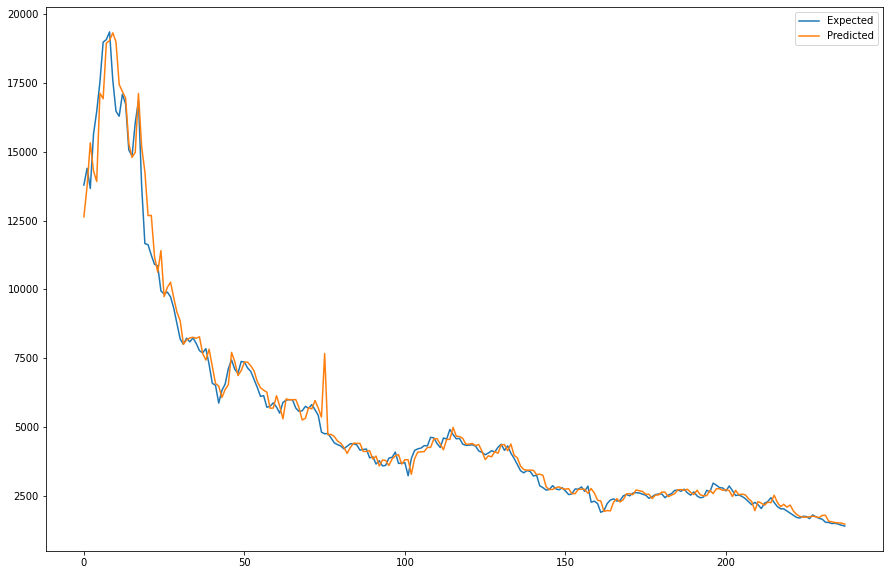

In [132]:
pt.plot(y, label='Expected')
pt.plot(pred, label='Predicted')
pt.legend()
pt.show()

ARIMA

In [133]:
import statsmodels.api as sm
train=new_df.head(n=800)
model=sm.tsa.statespace.SARIMAX(train['Price'],order=(5, 3, 1),seasonal_order=(5,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [135]:
model2=sm.tsa.statespace.SARIMAX(train['Price'],order=(3, 2, 1))
results2=model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



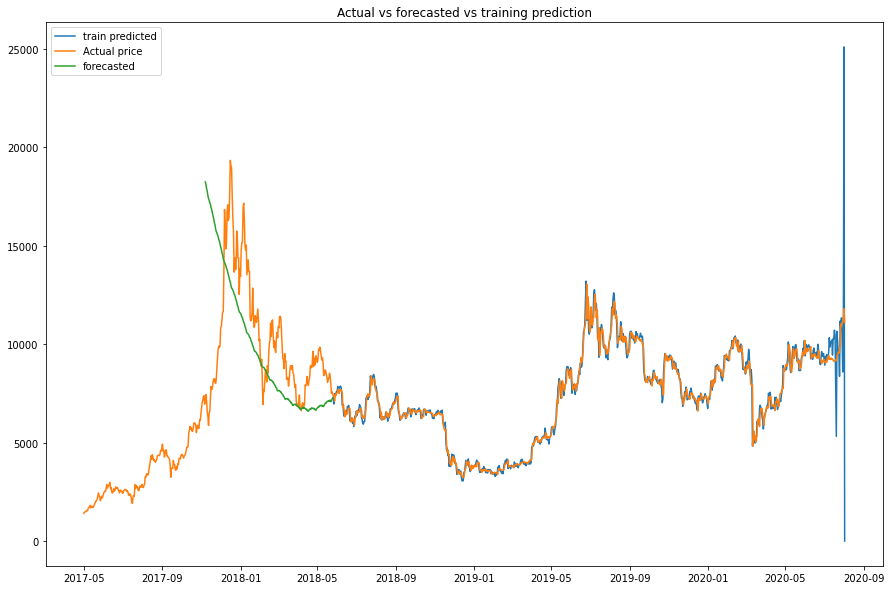

In [137]:
import matplotlib.pyplot as plt
forecatedvalue=results.forecast(steps=200)
train['Predicted']=results.predict()
plt.plot(train['Predicted'],label="train predicted")
plt.plot(new_df['Price'],label="Actual price")
plt.plot(forecatedvalue,label="forecasted")
plt.title("Actual vs forecasted vs training prediction")
plt.legend()
plt.rcParams['figure.figsize'] = [4,4]
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



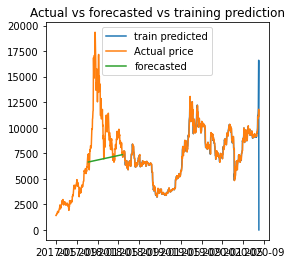

In [138]:
forecatedvalue2=results2.forecast(steps=200)
train['Predicted2']=results2.predict()
plt.plot(train['Predicted2'],label="train predicted")
plt.plot(new_df['Price'],label="Actual price")
plt.plot(forecatedvalue2,label="forecasted")
plt.title("Actual vs forecasted vs training prediction")
plt.legend()
plt.rcParams['figure.figsize'] = [12,6]
plt.show()

In [139]:
mse=mean_squared_error(train["Price"], train['Predicted'], squared=False)
rmspe = (np.sqrt(np.mean(np.square((train["Price"]-train['Predicted']) / train['Price'])))) * 100
print(rmspe)
print(mse)

7.2002248498345205
730.3503950024801


In [140]:
mse=mean_squared_error(train["Price"], train['Predicted2'], squared=False)
rmspe = (np.sqrt(np.mean(np.square((train["Price"]-train['Predicted2']) / train['Price'])))) * 100
print(rmspe)
print(mse)

5.42347347555938
528.2954383455034


Comparision on a simpler dataset for understanding models

The additive model is Y[t] = T[t] + S[t] + e[t]

The multiplicative model is Y[t] = T[t] * S[t] * e[t]

The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.